In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
dataset = pd.read_csv(r"F:\Payam\DL\MadaLine.csv")
dataset = dataset.replace(0 , -1)
dataset

,X1,X2,Class
0,-0.642823,0.720606,-1
1,-0.218126,0.677263,-1
2,-0.582930,-0.347496,-1
3,0.285127,0.091750,-1
4,-0.335577,-0.313893,-1
...,...,...,...
195,0.744066,-1.206548,1
196,-0.457547,1.286227,1
197,-1.020000,-0.783926,1
198,1.363429,-0.800250,1


In [3]:
classA = dataset[dataset['Class'] ==-1]
classB = dataset[dataset['Class'] == 1]
classA_vals = classA[['X1' , 'X2']].values
classB_vals = classB[['X1' , 'X2']].values
classA_X1 = classA_vals[:,0] 
classA_X2 = classA_vals[:,1] 
classB_X1 = classB_vals[:,0] 
classB_X2 = classB_vals[:,1]

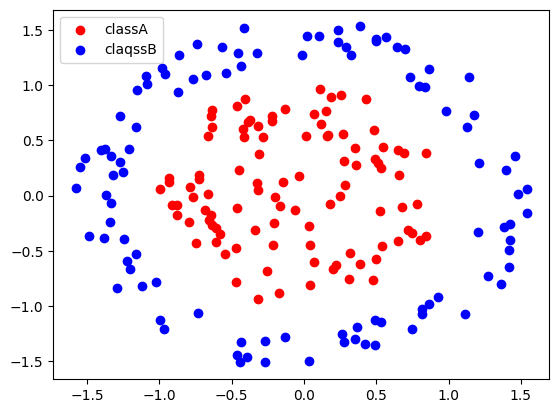

In [4]:
plt.scatter(classA_X1 , classA_X2 , color="red")
plt.scatter(classB_X1 , classB_X2 , color="blue")
plt.legend(["classA" , "claqssB"] , loc="upper left")

In [5]:
target = dataset.iloc[:, 2].values
X = dataset.iloc[:, [0, 1]].values

print("t : " ,target)
print("x : " , X)

t :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]
x :  [[-0.64282255  0.72060647]
 [-0.21812607  0.67726261]
 [-0.58292983 -0.34749617]
 [ 0.28512668  0.09174997]
 [-0.33557667 -0.31389274]
 [ 0.31739521 -0.52331519]
 [-0.63941109 -0.17120822]
 [ 0.11580448  0.64575158]
 [ 0.18989616  0.89158849]
 [ 0.06790498 -0.60116898]
 [-0.16874776 -0.09692314]
 [ 0.49544098 -0.57668554]
 [-0.54431436 -0.52899816]
 [ 0.26732691  0.55691933]
 [

In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
   
   markers = ['s', 'x', 'o', '^', 'v']
   colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
   cmap = ListedColormap(colors[:len(np.unique(y))]) # type: ignore

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = np.array(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T))
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker= markers[idx], label=cl) 

In [10]:
class Madaline:
    def __init__(self , n_adaline , epochs , learning_rate):
        self.n_adaline = n_adaline
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    
    def predict(self,X):
        t_pred = []
        for p in range(X.shape[0]):
            z_in = np.dot(self.weights , X[p]) + self.bias
            z_out = self.activation(z_in)
            y_in = np.dot(z_out , self.v) + self.final_bias
            y_out = self.activation(y_in)
            t_pred.append(y_out)
                               

        return t_pred   
        
        
    def activation(self,z):
        rt = np.array(np.where(z>=0,1,-1))
        return rt
    
    def fit(self , X , target):
        self.v = (1/self.n_adaline)*np.ones(self.n_adaline)
        
        self.weights = np.random.rand(self.n_adaline , X.shape[1])
        self.bias = np.random.random_sample(self.n_adaline)
        self.final_bias = 1/self.n_adaline
        self.loss = []
        self.error = []
        self.accuracy = []
        
        for epoch in range (self.epochs):
            for x_in_row in range (X.shape[0]):
                
                self.z_in = np.dot(self.weights , X[x_in_row]) + self.bias
                self.z_out = self.activation(self.z_in)
                self.y_in = np.dot(self.z_out , self.v) + self.final_bias
                self.y_out = self.activation(self.y_in)
                #print(self.y_out)
                j = np.where(self.z_in >= 0)
                if target[x_in_row] != self.y_out and target[x_in_row] == 1:
                    
                    index = np.argmin(np.abs(self.z_in))
                    self.weights[index] = self.weights[index] +self.learning_rate*(1 - self.z_in[index])*X[x_in_row]
                    self.bias[index] = self.bias[index]+ self.learning_rate*(1 - self.z_in[index])
                
                elif target[x_in_row] != self.y_out and target[x_in_row] == -1:        
                    
                    
                    
                    self.weights[j] =self.weights[j] + self.learning_rate*np.outer(-1-self.z_in[j],X[x_in_row])
                    self.bias[j] = self.bias[j] + self.learning_rate*(-1-self.z_in[j])
                else:
                    pass   
                
                self.error.append(0.5*(target[x_in_row] - self.y_in)**2)
            self.loss.append(sum(self.error)/len(self.error))
            self.accuracy.append(np.sum(self.predict(X) == target)/len(target))
            
            
                    
                        
                
        return self
      
            
        
            

C:\Users\saeme\AppData\Local\Temp\ipykernel_13024\3675933881.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


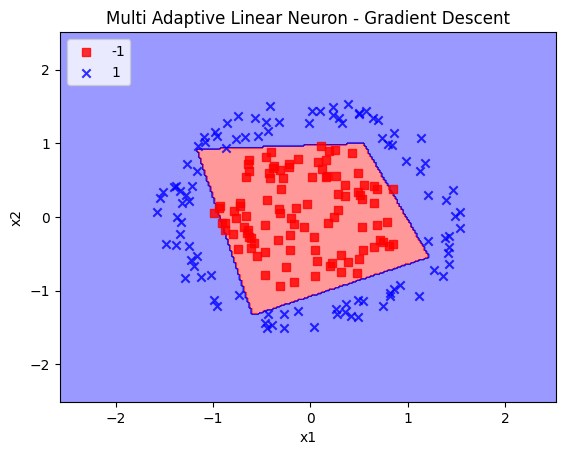

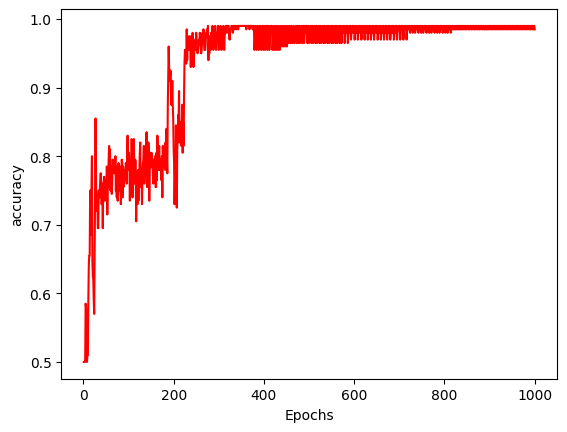

[0.3023999999999998,
 0.2800000000000004,
 0.26613333333333355,
 0.26740000000000147,
 0.27424000000000204,
 0.2793333333333345,
 0.28274285714285763,
 0.28630000000000055,
 0.2856888888888891,
 0.28511999999999826,
 0.2868363636363598,
 0.28439999999999444,
 0.2827076923076859,
 0.2819999999999928,
 0.28245333333332584,
 0.28269999999999207,
 0.2817411764705799,
 0.2815555555555468,
 0.27991578947367585,
 0.28075999999999207,
 0.28179047619046876,
 0.28312727272726634,
 0.2849043478260813,
 0.2859666666666616,
 0.2869759999999958,
 0.28756923076922736,
 0.28805925925925663,
 0.28725714285714055,
 0.28673103448275655,
 0.2874399999999983,
 0.2882580645161275,
 0.28899999999999876,
 0.28976969696969584,
 0.2906588235294111,
 0.2917485714285712,
 0.29157777777777666,
 0.29128648648648414,
 0.29193684210525916,
 0.2929230769230719,
 0.29321999999999443,
 0.2938536585365793,
 0.2944952380952314,
 0.29488372093022536,
 0.2952909090909013,
 0.29596444444443587,
 0.2964173913043385,
 0.296885

In [15]:
model = Madaline( 5,  1000, 0.3)
model.fit(X , target)


plot_decision_regions(X,target,model)
plt.title('Multi Adaptive Linear Neuron - Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()



plt.plot(range(1, len(model.accuracy) + 1), model.accuracy,'red')
plt.xlabel('Epochs')
plt.ylabel('accuracy') 
plt.show()
model.loss


